In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set option to view all columns
pd.set_option('display.max_columns',None)

In [3]:
train_data=pd.read_csv('train_data.csv',index_col=0)
train_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0,0,0,0,1,0,0,0
1,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0,0,0,0,1,0,0,0
2,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0,0,0,0,1,0,0,0
3,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0,0,0,0,1,0,0,0
4,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0,0,0,0,1,0,0,0


In [4]:
x=train_data.drop('churn',axis=1)
y=train_data[['churn']]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# import evaluation functions
from sklearn.metrics import confusion_matrix,accuracy_score

In [9]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')
etc=ExtraTreesClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()

In [10]:
lr.fit(x_train,y_train)
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
etc.fit(x_train,y_train)
xgb.fit(x_train,y_train)
lgb.fit(x_train,y_train)

[22:47:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier()

In [11]:
data={'Models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','XGBClassifier','LGBMClassifier'],
     'Accuracy_score':[accuracy_score(y_test,lr.predict(x_test)),accuracy_score(y_test,dtc.predict(x_test)),accuracy_score(y_test,rfc.predict(x_test)),
                      accuracy_score(y_test,etc.predict(x_test)),accuracy_score(y_test,xgb.predict(x_test)),accuracy_score(y_test,lgb.predict(x_test))]}
predictions=pd.DataFrame(data)

In [12]:
predictions

,Models,Accuracy_score
0,LogisticRegression,0.902249
1,DecisionTreeClassifier,0.999740
2,RandomForestClassifier,0.999844
3,ExtraTreesClassifier,0.998789
4,XGBClassifier,0.962301
5,LGBMClassifier,0.923547


random frorest classifier has the highest accuracy score

In [13]:
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [14]:
importance=pd.DataFrame(sorted(zip(classifier.feature_importances_,x.columns),reverse=True),columns=['importance','attributes'])

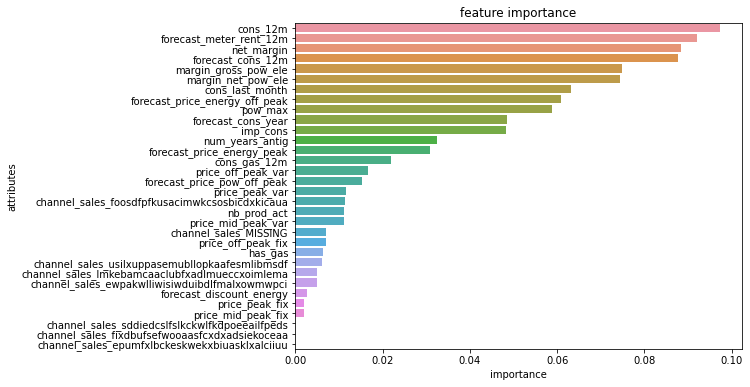

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(data=importance,x='importance',y='attributes')
plt.title('feature importance');

# insights

From the model, price is not a major factor of the churn. According to the model:
1. Electricity consumption for the past 12 months is the highest determinant of the customer
churn. This is followed by the
2. Forecasted bill of meter rental for the next 12 months
3. Total net margin
4. Forecasted electricity consumption for next 12 months
5. Net margin on power subscription.